# 필요 패키지 로딩

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from IPython.display import display, Image
import matplotlib.pyplot as plt
import seaborn as sns

- 손실함수의 개념과 손실함수가 필요한 이유를 이해하고, 쓸 수 있는 함수의 종류와 구현을 익힌다.
- 손실함수를 미분해서 구하는 기울기는 손실함수값을 줄이기 위해 필요한 것임을 이해하고, 그 구현을 수치미분과 해석미분 두 가지 방법으로 진행해본다.
- 손실함수를 정의하고 경사하강법을 활용해 선형 방정식 형태로 된 모델을 학습시켜 실수형 데이터를 예측하는 선형 회귀 프로젝트의 전체 프로세스를 경험하고 익힌다.
- sklearn의 LinearRegression을 활용해 빠르고 간편하게 선형 회귀 하는 방법을 익힌

In [2]:
# 시본이 보유한 데이터셋

sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

# 데이터 로딩

In [3]:
tips = sns.load_dataset('tips')
print(tips.shape)
tips.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
# 정보
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


- https://kkokkilkon.tistory.com/37
더미변수 관련 참고글

In [ ]:
# 구조
tips.DESRC

AttributeError: ignored

In [5]:
# 원-핫 인코딩
tips = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'])
tips.head()

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,0,1,0,1,0,0,0,1,0,1
1,10.34,1.66,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3.50,3,1,0,0,1,0,0,0,1,0,1
3,23.68,3.31,2,1,0,0,1,0,0,0,1,0,1
4,24.59,3.61,4,0,1,0,1,0,0,0,1,0,1


In [6]:
# 종속변수
x = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',\
          'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner']].values
y = tips['tip'].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(195, 12) (195,)
(49, 12) (49,)


In [8]:
# 파라미터 설정
w = np.random.rand(12) # 난수 생성
b = np.random.rand()

# 기초 모델 생성

In [14]:
# model
def model(X, W, b):
  pred = 0
  for i in range(12):
    pred += X[:, i] * W[i]
  pred += b
  return pred

  # MSE function
def mse(a, b):
  mse = ((a - b) ** 2).mean()
  return mse

# loss function
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = mse(predictions, y)
    return L


In [10]:
# 경사하강법 함수
def gradient(X, W, b,  y):
  N = len(w)
  y_pred = model(X, W, b)
  # gradient
  dW = 1/N * 2 * X.T.dot(y_pred - y)
  db = 2 * (y_pred - y).mean()
  return dW, db

In [11]:
dW, db = gradient(x, w, b, y)
print("dW:", dW)
print("db:", db)

dW: [8888.1207925  1102.84090211  267.04378537  129.14036215  155.54920717
  240.63494035   92.64661937   29.07827686  142.64698078  131.8122705
  100.08725226  296.09689526]
db: 19.48446627147978


In [12]:
LEARNING_RATE = 0.0001

In [15]:
losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, w, b, y_train)
    w -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(x, w, b, y)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 2.9443
Iteration 20 : Loss 2.8520
Iteration 30 : Loss 2.7598
Iteration 40 : Loss 2.6731
Iteration 50 : Loss 2.5916
Iteration 60 : Loss 2.5149
Iteration 70 : Loss 2.4428
Iteration 80 : Loss 2.3750
Iteration 90 : Loss 2.3111
Iteration 100 : Loss 2.2510
Iteration 110 : Loss 2.1944
Iteration 120 : Loss 2.1411
Iteration 130 : Loss 2.0908
Iteration 140 : Loss 2.0434
Iteration 150 : Loss 1.9988
Iteration 160 : Loss 1.9566
Iteration 170 : Loss 1.9168
Iteration 180 : Loss 1.8793
Iteration 190 : Loss 1.8438
Iteration 200 : Loss 1.8103
Iteration 210 : Loss 1.7786
Iteration 220 : Loss 1.7487
Iteration 230 : Loss 1.7203
Iteration 240 : Loss 1.6935
Iteration 250 : Loss 1.6681
Iteration 260 : Loss 1.6440
Iteration 270 : Loss 1.6212
Iteration 280 : Loss 1.5996
Iteration 290 : Loss 1.5791
Iteration 300 : Loss 1.5596
Iteration 310 : Loss 1.5411
Iteration 320 : Loss 1.5235
Iteration 330 : Loss 1.5068
Iteration 340 : Loss 1.4909
Iteration 350 : Loss 1.4758
Iteration 360 : Loss 1.4614
I

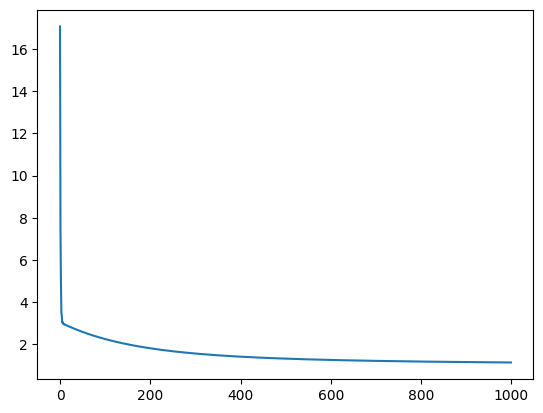

In [16]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [19]:
w,b

(array([ 0.07599339,  0.0342701 ,  0.39542413,  0.26135407,  0.30349066,
         0.34180093,  0.20696241,  0.63008806, -0.11445831,  0.08076264,
        -0.29147788, -0.07558956]),
 0.943421380378999)

In [17]:
prediction = model(X_test, w, b)
mse = loss(X_test, w, b, y_test)
mse

0.7168955636008457

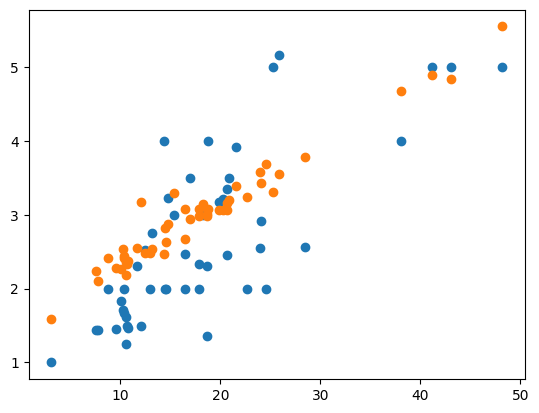

In [18]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

# linearRegression

In [20]:
# data 호출
tips = sns.load_dataset("tips")
tips = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'])
tips = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
             'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner', 'tip']]
# 변수 분리
X = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
          'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner']].values
y = tips['tip'].values
# 셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.linear_model import LinearRegression

# 모델 호출
model = LinearRegression()

#학숩
model.fit(X_train, y_train)

# 예측
predictions = model.predict(X_test)
predictions

array([2.91436632, 2.00292613, 3.96425583, 3.76380832, 2.14836306,
       2.67423448, 3.63934628, 2.29147245, 2.57207155, 2.45851225,
       2.90446763, 2.0573337 , 2.11817193, 2.35130838, 1.82976215,
       3.10830675, 2.95140176, 3.21602976, 2.56640892, 5.73957295,
       3.43490366, 3.22645102, 2.17139823, 1.94180002, 3.16394533,
       2.24547894, 2.14497574, 3.21025435, 3.20097595, 6.66803147,
       5.01111235, 1.57804024, 3.1909877 , 2.76652194, 2.98412862,
       3.85695724, 2.17008741, 5.46673999, 2.35586827, 2.99190732,
       2.03271177, 2.48465991, 3.44046814, 2.35532237, 1.92528104,
       0.87348926, 1.81911521, 3.04083954, 1.85436902])

In [23]:
from sklearn.metrics import mean_squared_error
# 평가
mse = mean_squared_error(y_test, predictions)
mse

0.7033566017436103

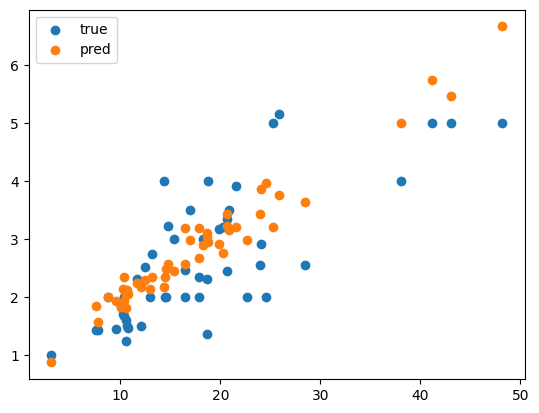

In [24]:
# 시각화
plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], predictions, label="pred")
plt.legend()
plt.show()